# 1. Import and become one with the data

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
# Download and unzip file of 10_food_classes images
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2025-07-26 08:56:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   160MB/s    in 3.1s    

2025-07-26 08:56:32 (160 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



### Now let's check out all of the different directories and sub-directories in the 10_food_classes file

In [4]:
import os

for(dirpath, dirnames, filenames) in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [5]:
# setup the training and test directory paths

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# setup the training and test directory paths

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
# View an image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_imag(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


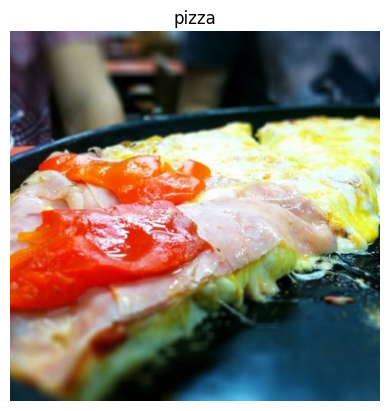

In [8]:
img = view_random_imag(target_dir=train_dir, target_class="pizza")

Image shape: (512, 512, 3)


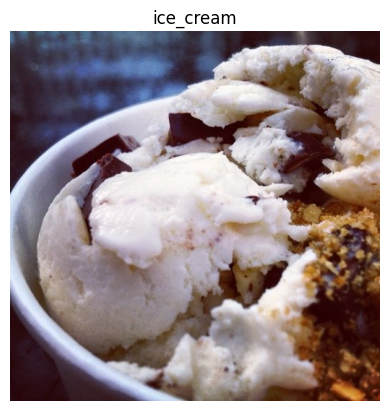

In [9]:
img = view_random_imag(target_dir=train_dir, target_class=random.choice(class_names))

# 2. Preprocess the data (prepare it for a model)

In [10]:
# Import data from directories and turn it into batches

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224, 224),
                                                                 batch_size=32,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(224, 224),
                                                                batch_size=32,
                                                                label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# 3. Create a model (start with a baseline)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

model_mcc_1 = Sequential([
  tf.keras.Input(shape=(224, 224, 3)),

  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),

  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_mcc_1.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# 4. Fit a model

In [12]:
history_mcc_1 = model_mcc_1.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.1515 - loss: 2.2364 - val_accuracy: 0.2768 - val_loss: 1.9714
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.3322 - loss: 1.9197 - val_accuracy: 0.3508 - val_loss: 1.8522
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.4606 - loss: 1.6077 - val_accuracy: 0.3680 - val_loss: 1.8182
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.6416 - loss: 1.0983 - val_accuracy: 0.3188 - val_loss: 2.2875
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.8196 - loss: 0.5885 - val_accuracy: 0.2900 - val_loss: 3.0404


In [13]:
model_mcc_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

# 5. Evaluate the model

In [14]:
model_mcc_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3064 - loss: 3.0140


[3.040388822555542, 0.28999999165534973]

In [15]:
import pandas as pd
df = pd.DataFrame(history_mcc_1.history)
df.head(3)

,accuracy,loss,val_accuracy,val_loss
0,0.206533,2.146518,0.2768,1.971448
1,0.354133,1.857950,0.3508,1.852179
2,0.481467,1.537665,0.3680,1.818207


<Axes: >

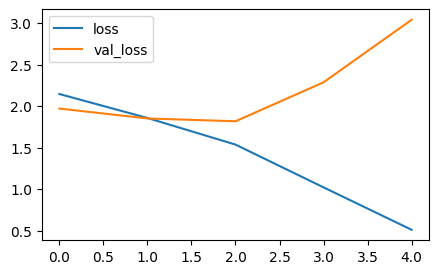

In [16]:
df[["loss", "val_loss"]].plot(figsize=(5, 3))

<Axes: >

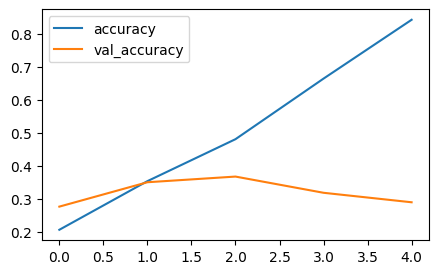

In [17]:
df[["accuracy", "val_accuracy"]].plot(figsize=(5, 3))

# 6. Adjust the model parameters


A couple of ways to prevent overfitting include:

* **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 Note: Preventing overfitting is also referred to as regularization

In [18]:
# simplify our model first

model_mcc_2 = Sequential([
  tf.keras.Input(shape=(224, 224, 3)),

  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),

  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_mcc_2.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

In [19]:
history_mcc_2 = model_mcc_2.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.1423 - loss: 2.3654 - val_accuracy: 0.2556 - val_loss: 2.0999
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.3443 - loss: 1.9187 - val_accuracy: 0.3060 - val_loss: 1.9746
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.4829 - loss: 1.5598 - val_accuracy: 0.2920 - val_loss: 2.0324
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.6594 - loss: 1.0770 - val_accuracy: 0.2648 - val_loss: 2.3264
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.8185 - loss: 0.6238 - val_accuracy: 0.2568 - val_loss: 2.9152


In [20]:
df = pd.DataFrame(history_mcc_2.history)
df.head(3)

,accuracy,loss,val_accuracy,val_loss
0,0.189467,2.213253,0.2556,2.099870
1,0.363867,1.864808,0.3060,1.974645
2,0.500667,1.504766,0.2920,2.032406


<Axes: >

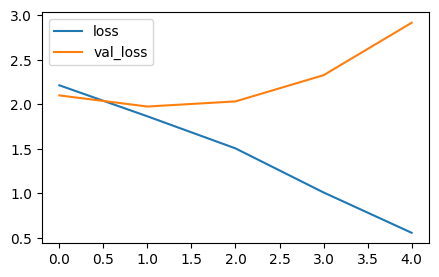

In [21]:
df[["loss", "val_loss"]].plot(figsize=(5, 3))

<Axes: >

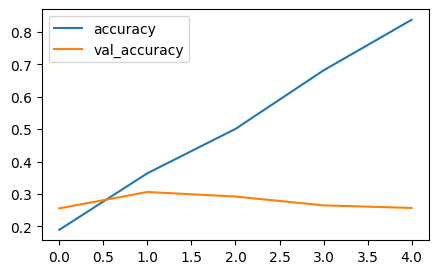

In [22]:
df[["accuracy", "val_accuracy"]].plot(figsize=(5, 3))

Hmm... even with a simplifed model, it looks like the model is still dramatically overfitting the training data.

How about **data augmentation**?

In [24]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
], name="data_augmentation")


model_mcc_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    # Data augmentation
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_mcc_3.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

In [25]:
history_mcc_3 = model_mcc_3.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.1127 - loss: 2.2915 - val_accuracy: 0.1696 - val_loss: 2.1924
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.1963 - loss: 2.1670 - val_accuracy: 0.2000 - val_loss: 2.1364
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.2161 - loss: 2.1174 - val_accuracy: 0.2304 - val_loss: 2.0889
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.2307 - loss: 2.0883 - val_accuracy: 0.2436 - val_loss: 2.0847
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.2469 - loss: 2.0700 - val_accuracy: 0.2584 - val_loss: 2.0320


In [26]:
df = pd.DataFrame(history_mcc_3.history)

<Axes: >

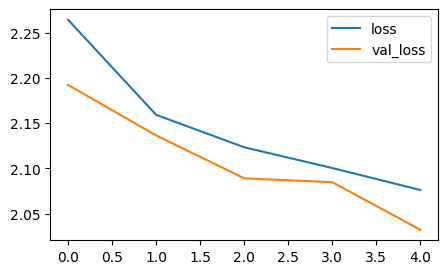

In [27]:
df[["loss", "val_loss"]].plot(figsize=(5, 3))

<Axes: >

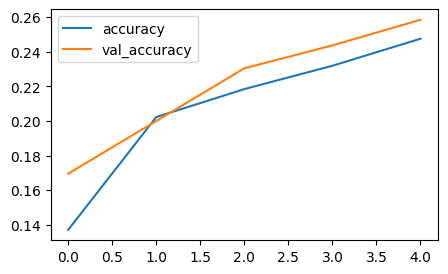

In [28]:
df[["accuracy", "val_accuracy"]].plot(figsize=(5, 3))

That's looking much better. We could keep going here...

... but there is one more trick wort trying - **knowledge transfer**.

In [29]:
# Create a function to import an image and resize it to be able to be used with our model
# https://www.tensorflow.org/api_docs/python/tf/io
# https://www.tensorflow.org/api_docs/python/tf/image


def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.0

  return img

In [30]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

## Making a prediction with our trained model

In [31]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
[[0.06398293 0.11973271 0.07810301 0.20847304 0.11145366 0.0637754
  0.02261177 0.0346952  0.21437016 0.08280212]]


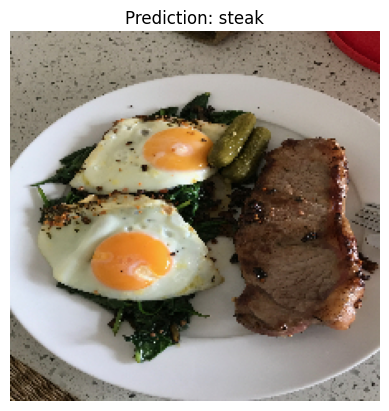

In [32]:
pred_and_plot(model=model_mcc_3,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.19415846 0.17410566 0.10698152 0.0595197  0.08773021 0.01516515
  0.15612215 0.0840767  0.03877609 0.08336434]]


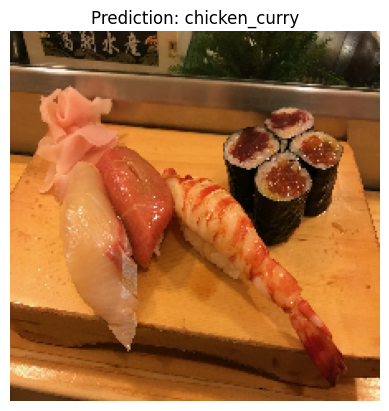

In [33]:
pred_and_plot(model=model_mcc_3,
              filename="03-sushi.jpeg",
              class_names=class_names)

### Saving and loading our model

In [40]:
model_mcc_3.save("model_mcc_3.keras")

In [41]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model_mcc_3.keras")
loaded_model.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.2779 - loss: 2.0325


[2.031989097595215, 0.25839999318122864]